<a href="https://colab.research.google.com/github/Anas182000/CARDIOVASCULAR-RISK-PREDICTION/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description
Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# 1) Know Your Data

LOADING THE DATASET

In [ ]:
#IMPORTING THE DRIVE

from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline
     

In [ ]:
path="/content/drive/MyDrive/CAPSTONE PROJECT - 3/data_cardiovascular_risk.csv"
df_cd=pd.read_csv(path,index_col="id")

In [ ]:
df_cd.shape

(3390, 16)

In [ ]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [ ]:
df_cd.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df_coloumn=df_cd.columns

# DATA WRAGLING

NULL VALUES

In [ ]:
df_cd.isnull().sum()  #CHECKING THE NULL VALUES


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

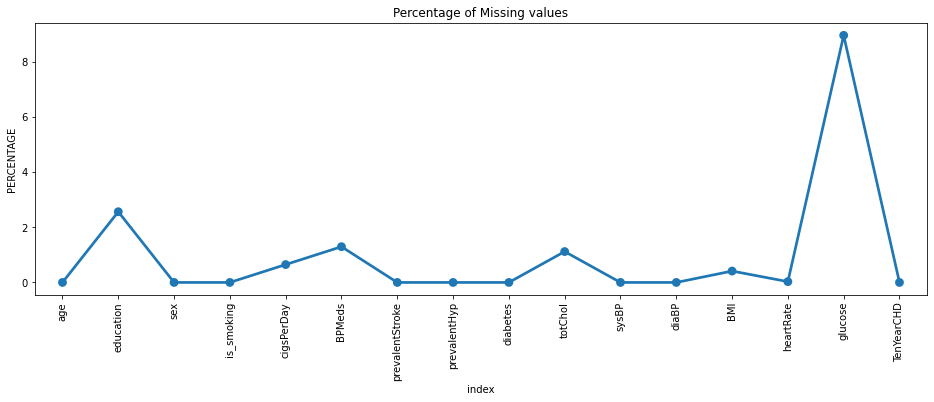

In [ ]:
#PLOTTING GRAPH FOR NULL VALUES
missing = pd.DataFrame((df_cd.isnull().sum())*100/df_cd.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#REPLACING NULL VALUES WITH MEDIAN
df_cd['glucose']= df_cd['glucose'].fillna(df_cd['glucose'].median())
df_cd["heartRate"]= df_cd["heartRate"].fillna(df_cd['heartRate'].median())
df_cd['education']= df_cd['education'].fillna(df_cd['education'].median())
df_cd['cigsPerDay']= df_cd['cigsPerDay'].fillna(df_cd['cigsPerDay'].median())
df_cd['BPMeds']= df_cd['BPMeds'].fillna(df_cd['BPMeds'].median())
df_cd['totChol']= df_cd['totChol'].fillna(df_cd['totChol'].median())
df_cd['BMI']= df_cd['BMI'].fillna(df_cd['BMI'].median())



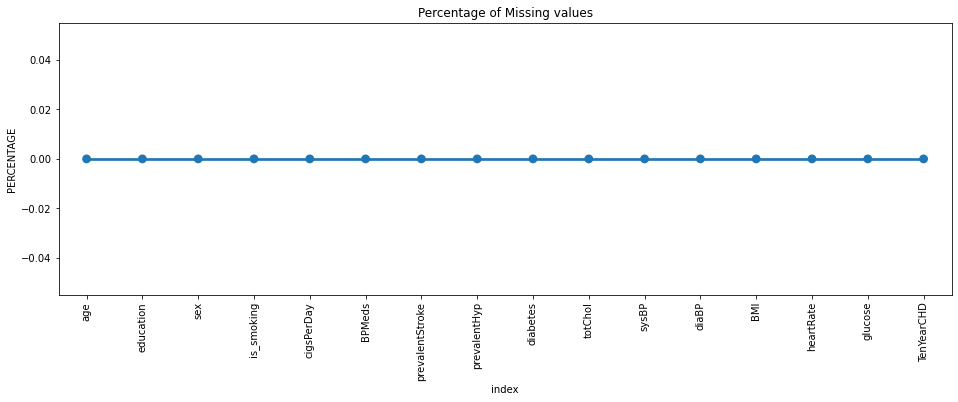

In [ ]:
#PLOTTING GRAPH FOR NULL VALUES
missing = pd.DataFrame((df_cd.isnull().sum())*100/df_cd.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
df_cd.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


DUPLICATE VALUES

In [ ]:
# Checking Duplicate Values
value=len(df_cd[df_cd.duplicated()])
print("The number of duplicate values in the data set is = ",value)


The number of duplicate values in the data set is =  0


CONCLUSION : 

**No duplicate values and Null values are present in our dataset.**

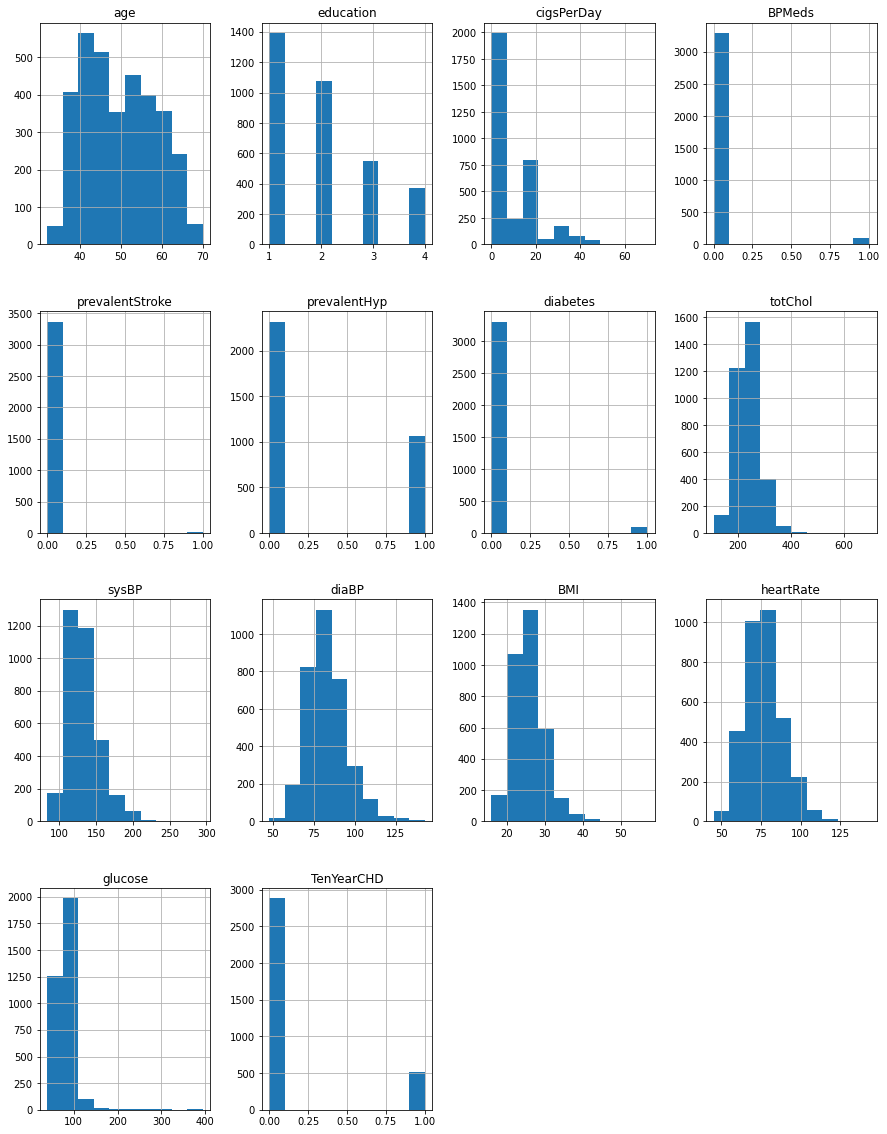

In [ ]:
# DISTRIBUTION OF DATA
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_cd.hist(ax = ax)
plt.show()

From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced.



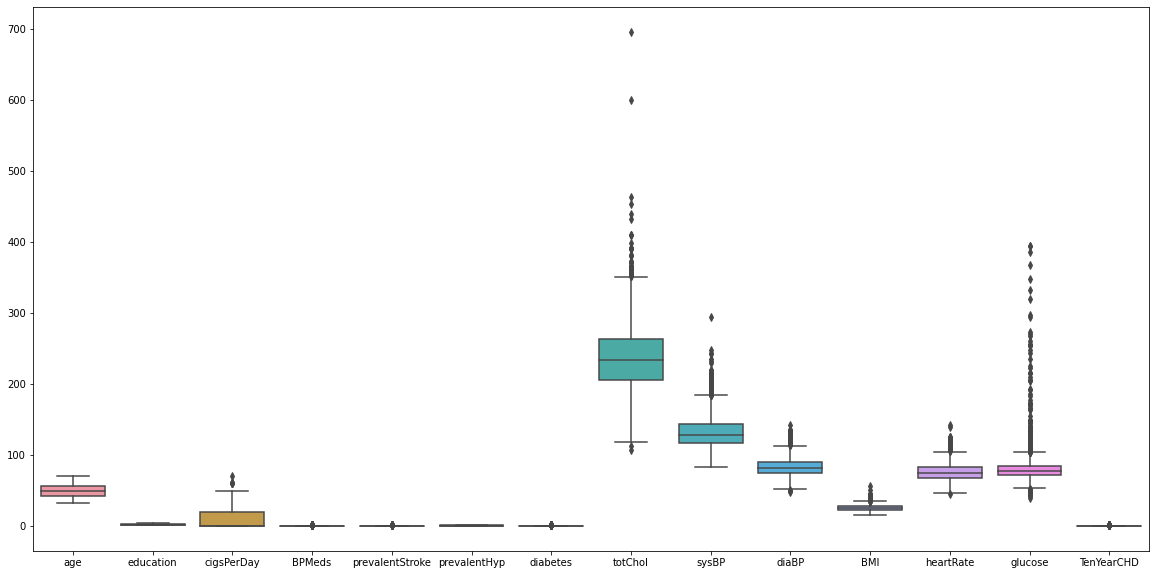

In [ ]:
#CHECKING OUTLIERS

plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df_cd)
plt.show()
     

# FEATURES TYPE


In [ ]:
# Lets check the discrete and continuous features
#bcz no categorical features has more than 4 unique value

categorical_features = [i for i in df_cd.columns if df_cd[i].nunique()<=4]
numeric_features = [i for i in df_cd.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)
     

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


# EDA

In [ ]:
# counts the dependent variable data set
df_cd["TenYearCHD"].value_counts()



0    2879
1     511
Name: TenYearCHD, dtype: int64

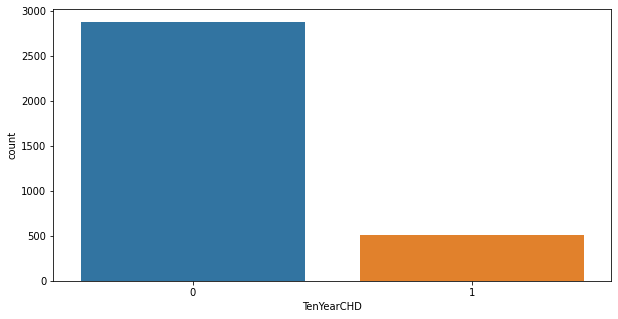

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "TenYearCHD", data = df_cd)

CONCLUSION : The more numbers people are not infected with disease.

In [ ]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df_cd, x = column)

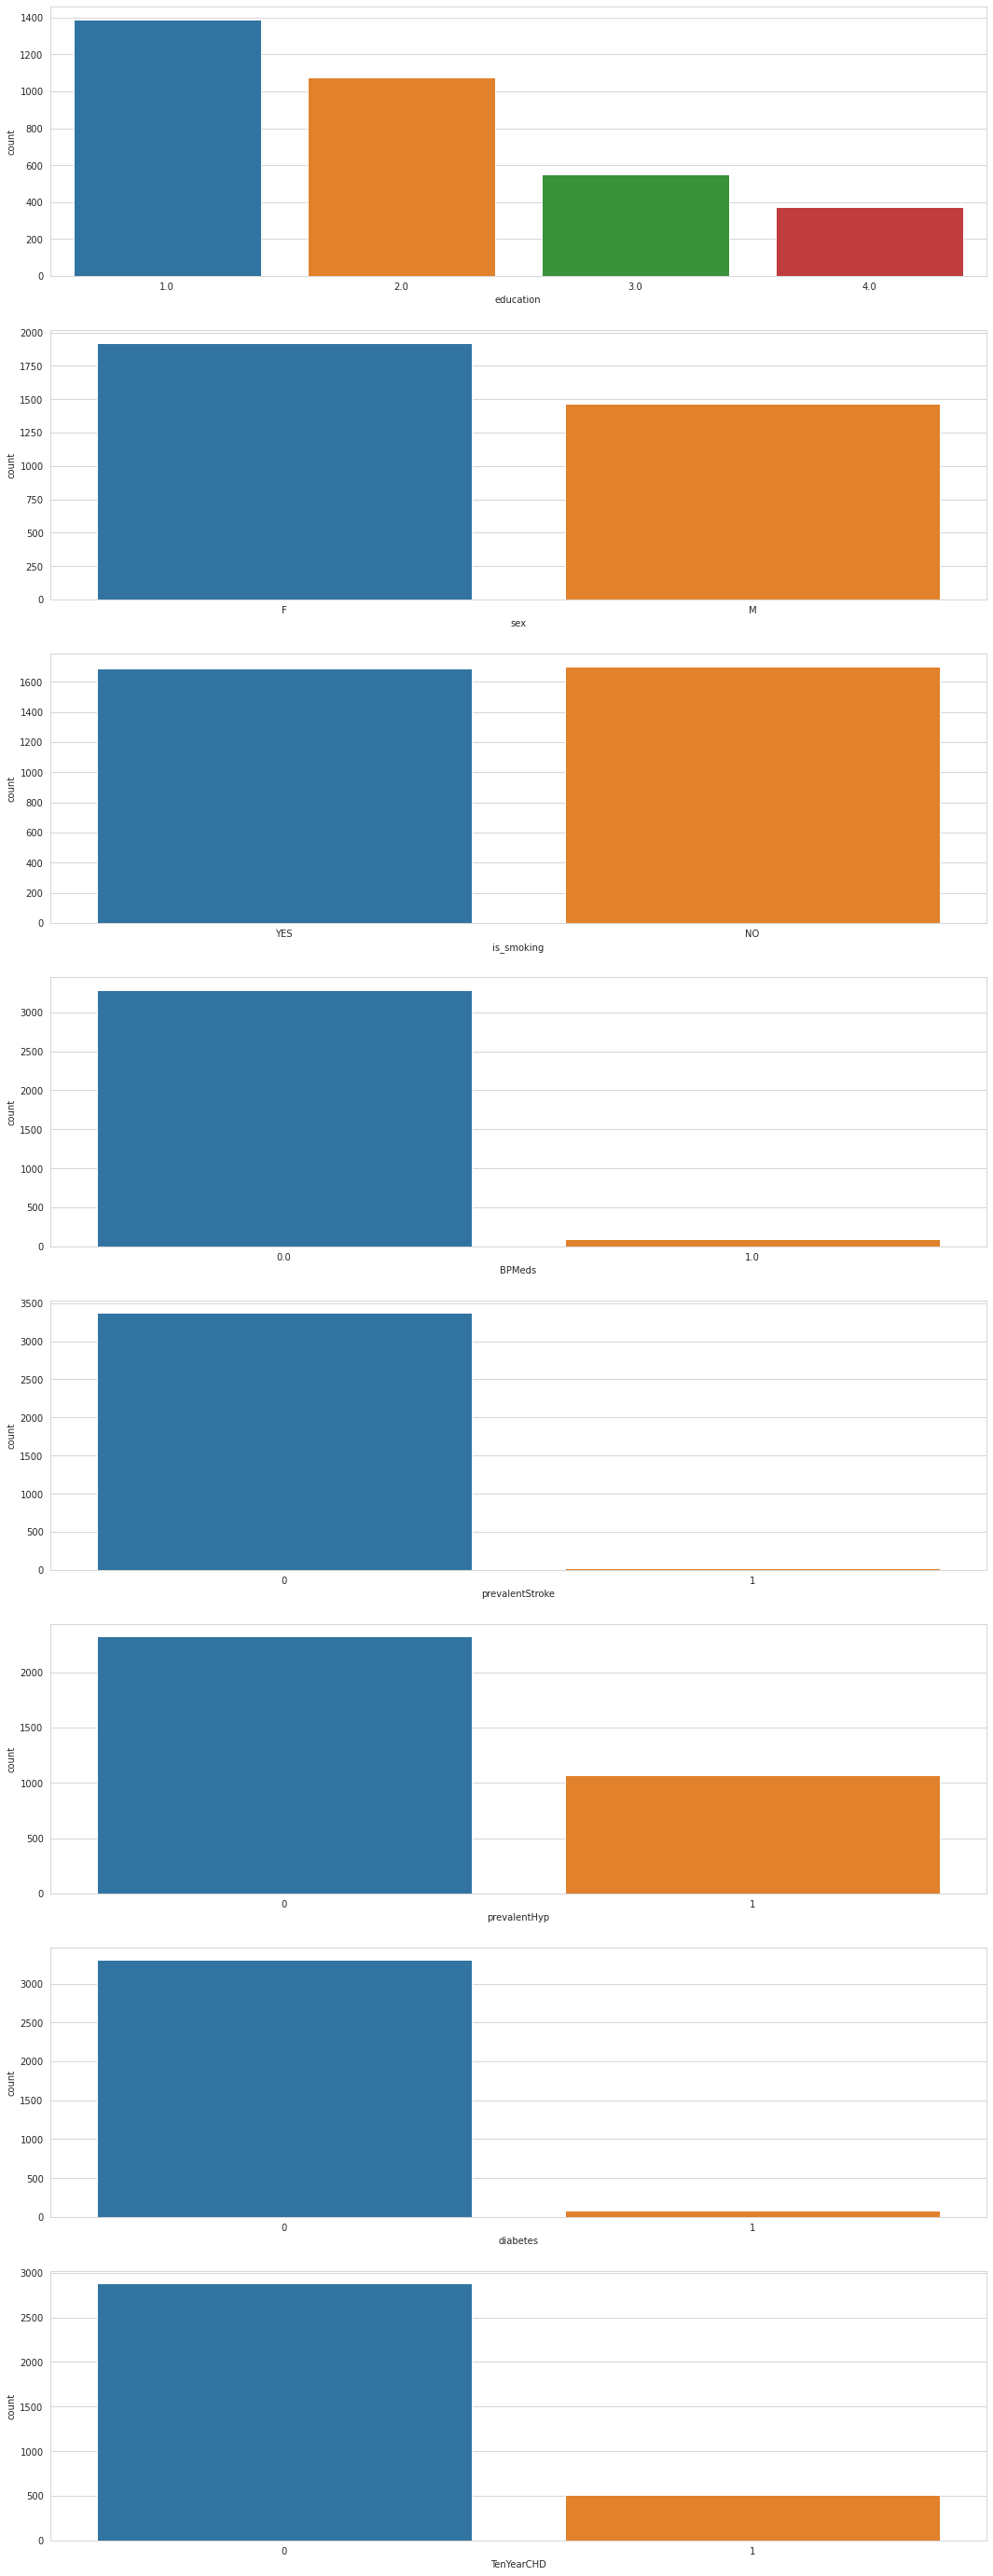

In [ ]:
# Creating countplots using above function
count_plotting(categorical_features)
     


The graphs above show, categorical columns in the form of countplots, we can understand that:


:Females are more in proportion to men by a small margin.


:There are more non-smokers than smokers by a small margin, both are around 1600 each.

:Around 1500 people have an education level 1, and almost 400 people have an education level of 4. The levels are not defined.

:More than 3000 people are not on BP medication

:Only a small number of people have suffered a stroke previously.

:Around 1000 people were hypertensive.

:A large number (> 3000) of the people do not have diabetes.

In [ ]:
# Creating a function to plot distribution of numerical columns
def dist_plotting(columns):
  ''' Returns subplots of histograms using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,40))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = df_cd[column], kde = True)

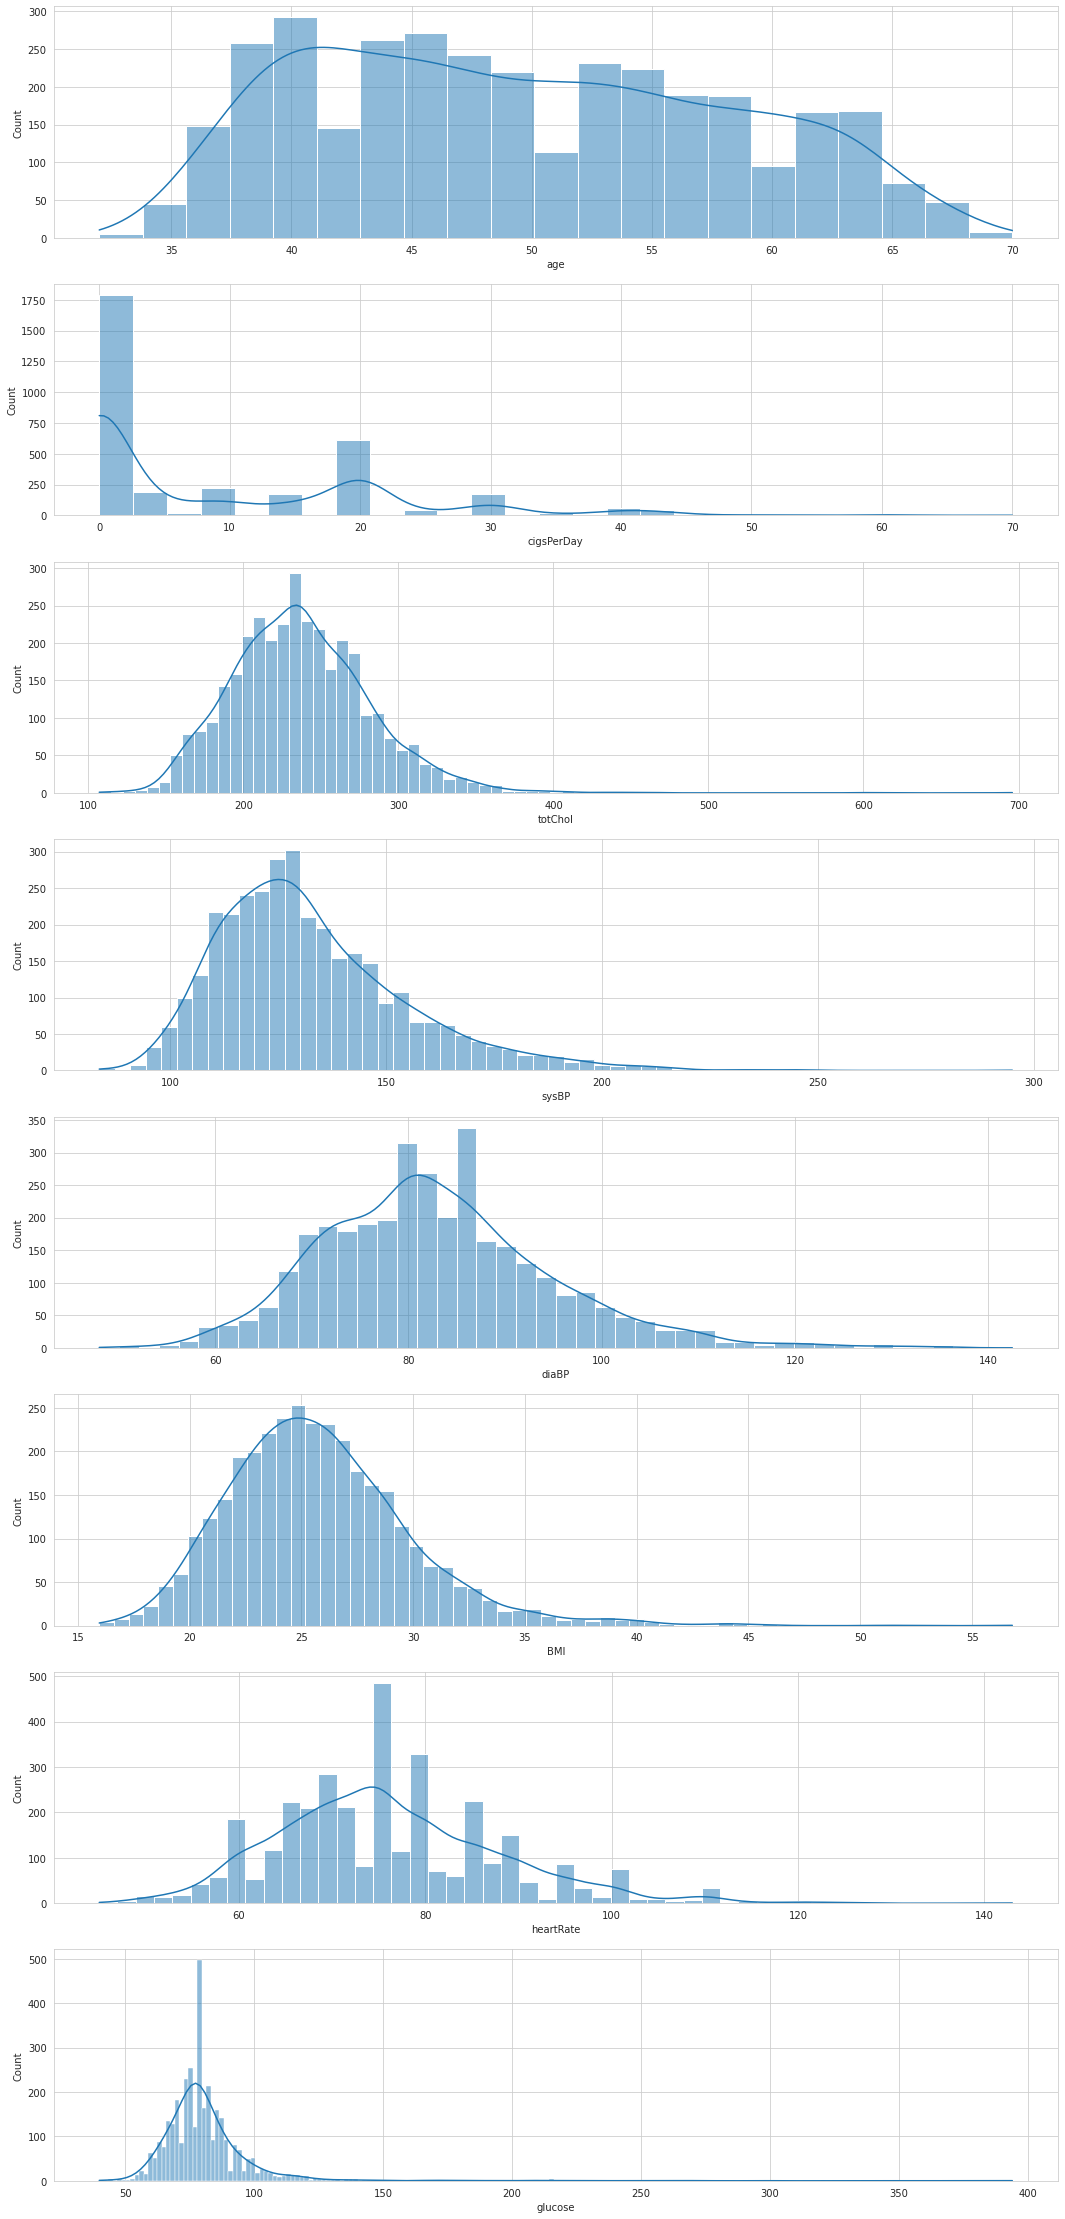

In [ ]:
# Using the function to plot graphs for numerical columns
dist_plotting(numeric_features)
     

CONCLUSION :

:As seen from the above histograms, we can understand that :

:Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.

:Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.

:Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.

:Systolic BP ranges mainly from 100 to 200.

:Diastolic BP ranges mainly from 60 to 120.

:BMI ranges mainly from 16 to 40.

:Heart rate ranges from 40 to 110 and most occurances are around 75.

:Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.


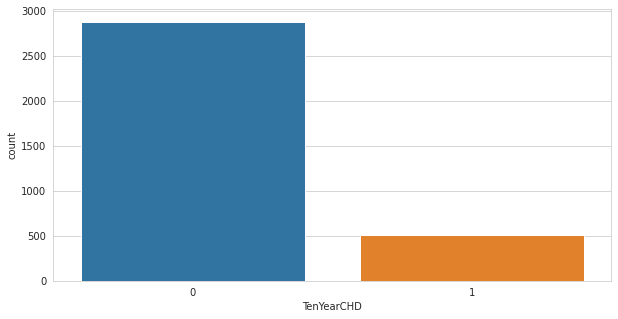

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "TenYearCHD", data = df_cd)

AGE

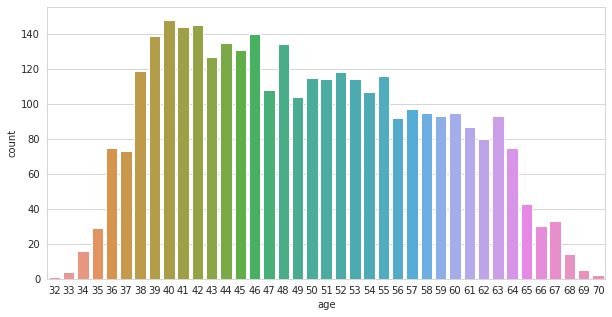

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'age', data = df_cd)

CONCLUSION : wecan clearly see that the age between 39-50 are more prone to disease.


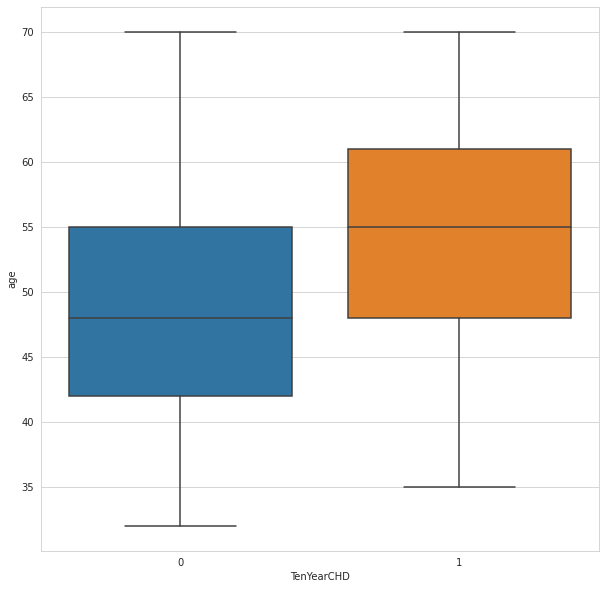

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="age", data=df_cd)

EDUCATION

In [ ]:
df_cd['education'].value_counts()

1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64

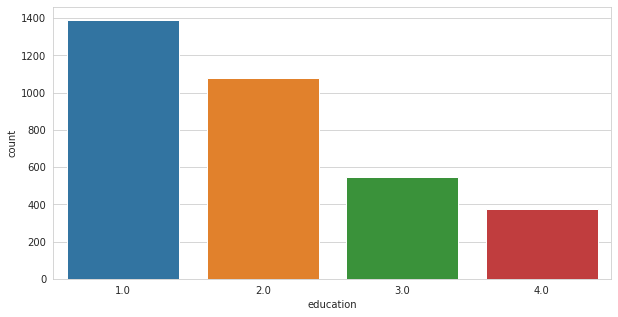

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'education', data = df_cd)

CONCLUSION : More number of patients are university students followed by Graduates then High school students and then uneducated .

SEX


In [ ]:
df_cd['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

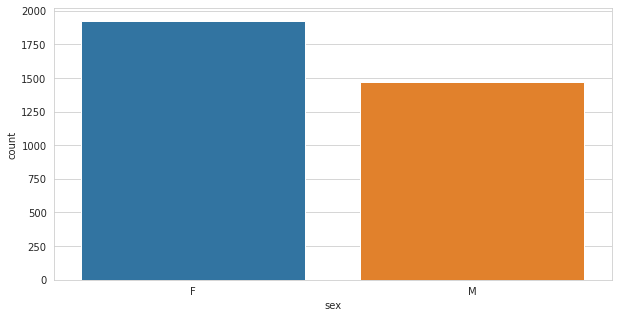

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', data = df_cd)

CONCLUSION : females are more prone to disease

DIABETES


In [ ]:
df_cd['diabetes'].value_counts()



0    3303
1      87
Name: diabetes, dtype: int64

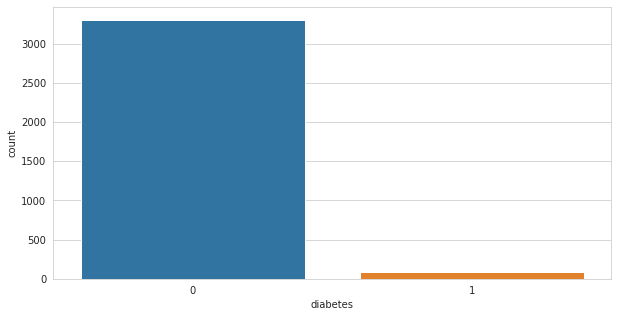

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'diabetes', data = df_cd)

In [ ]:
df_cd["is_smoking"].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

CONCLUSION : Diabitic Factor has no much affect upon the person.

BIVARIATE

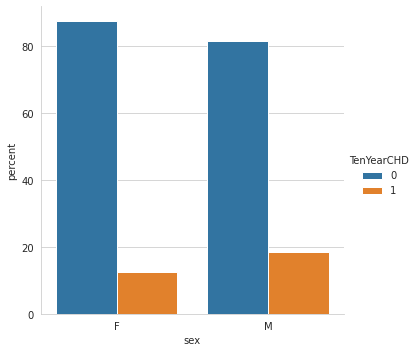

In [ ]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'sex', 'TenYearCHD'

(df_cd
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

CONCLUSION : females has more chance of 10-year risk of future coronary heart disease (CHD).

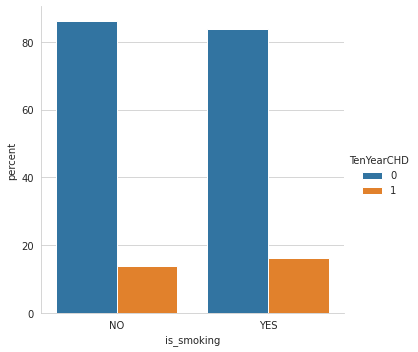

In [ ]:
x,y = 'is_smoking', 'TenYearCHD'

(df_cd
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

# LINEARITy



In [ ]:
#Encoding the categorical columns
df_cd['sex'] = np.where(df_cd['sex']=='M',1,0)                                        #1st way to encode(using numpy library)
df_cd['is_smoking'] = df_cd['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)       #2nd way to encode(using the apply and lambda function)  

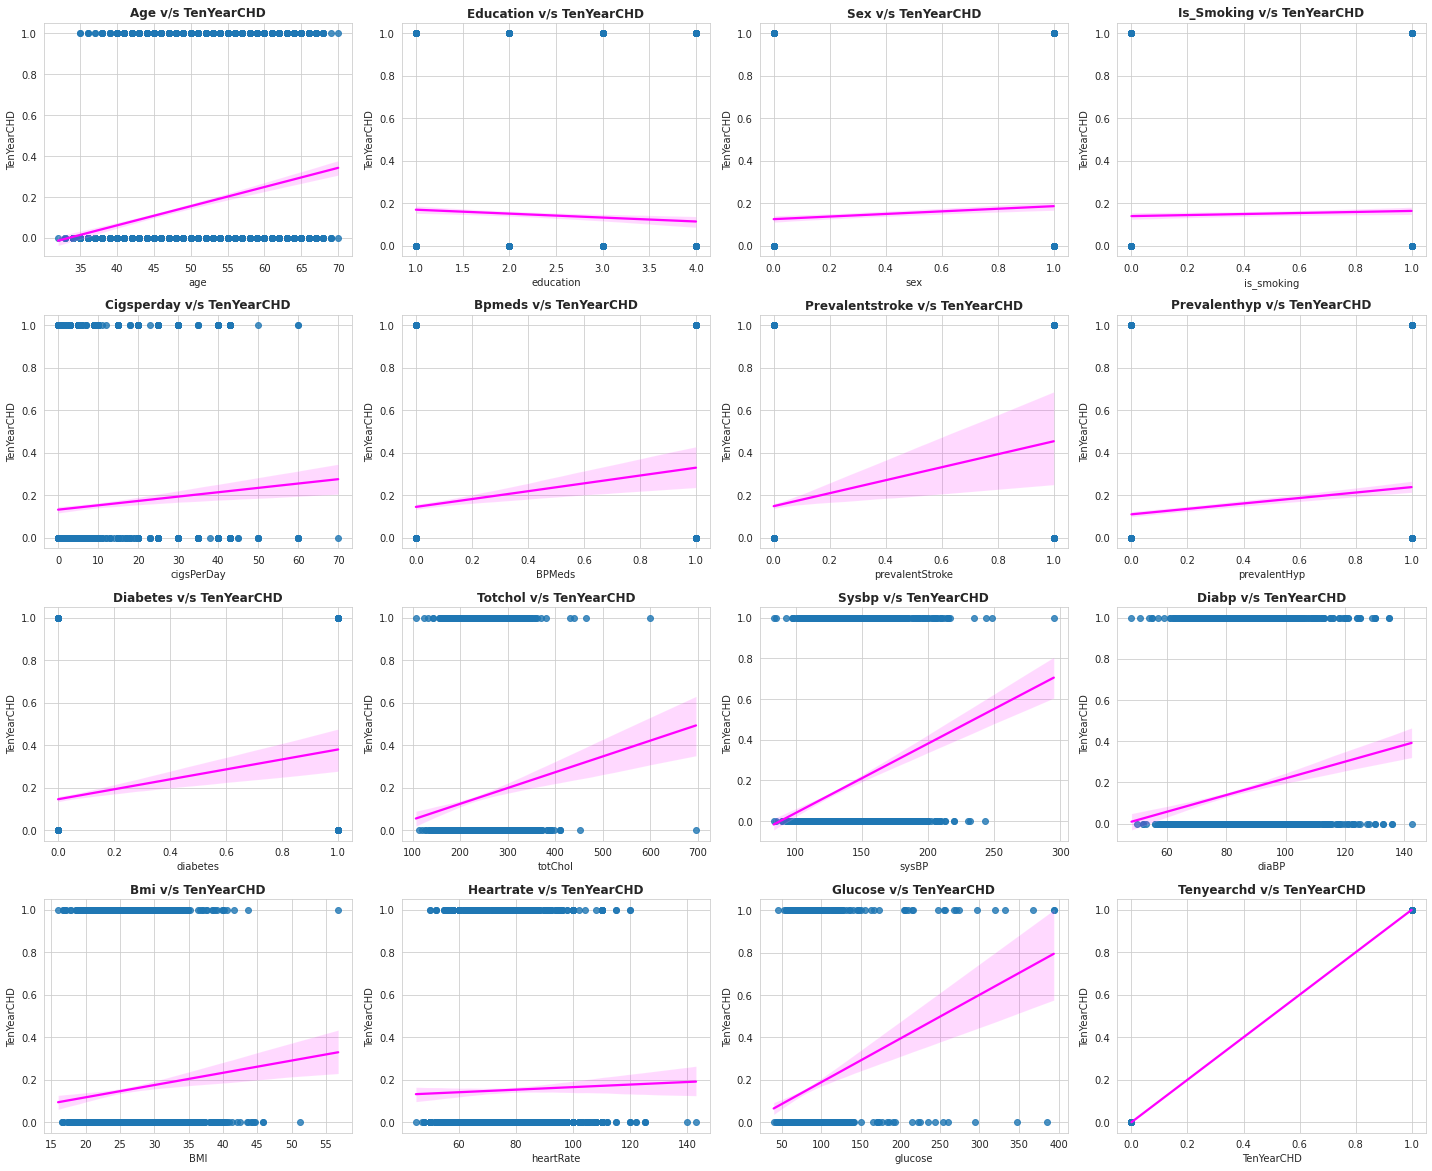

In [ ]:
# Checking Linearity

independent_variables = [i for i in df_cd.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(20,20))
for n,column in enumerate(df_cd.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df_cd[column], y =df_cd['TenYearCHD'],line_kws={"color": "magenta"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

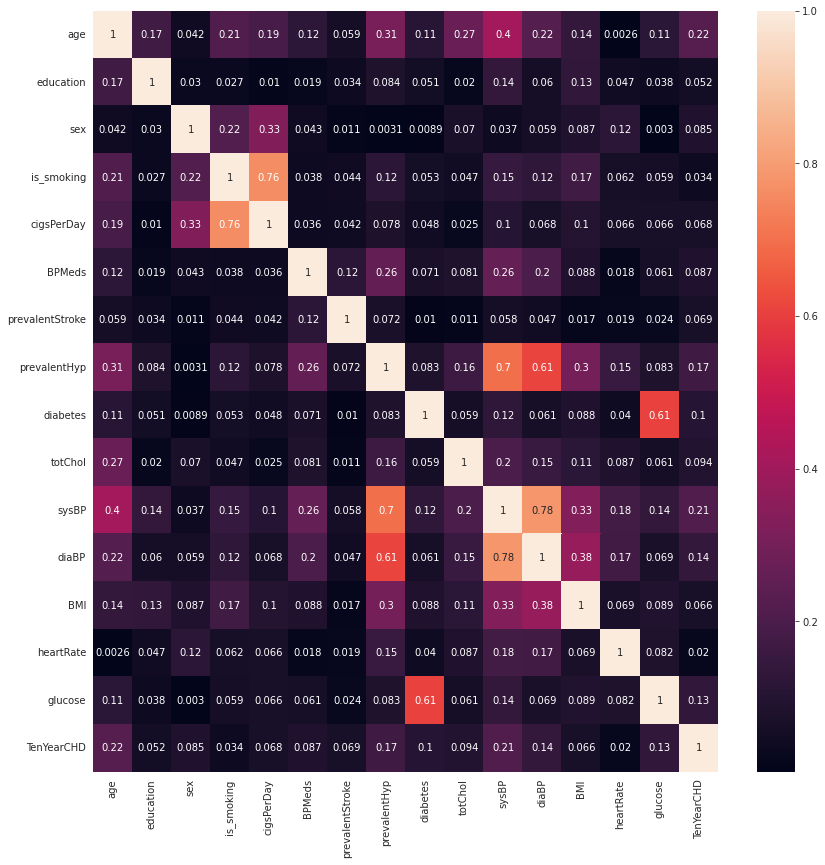

In [ ]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = df_cd.corr()
sns.heatmap(abs(correlation), annot=True)

# MODELS

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [ ]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'
     

In [ ]:
df_cd['Hypertension'] = df_cd.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_cd.head()
     

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
id,,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2


Blood glucose levels can be used to classify the severity of Diabetes.

In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'    

In [ ]:
df_cd['Diabetes'] = df_cd['glucose'].apply(lambda x: diabetes_grade(x))
df_cd.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
id,,,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1


The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [ ]:
df_cd['SmokingFactor'] = df_cd['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
df_cd.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2,1,1.098612
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1,0.000000
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,2.302585
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,2.995732
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1,3.401197


In [ ]:
# remove not useful columns
df_cd.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

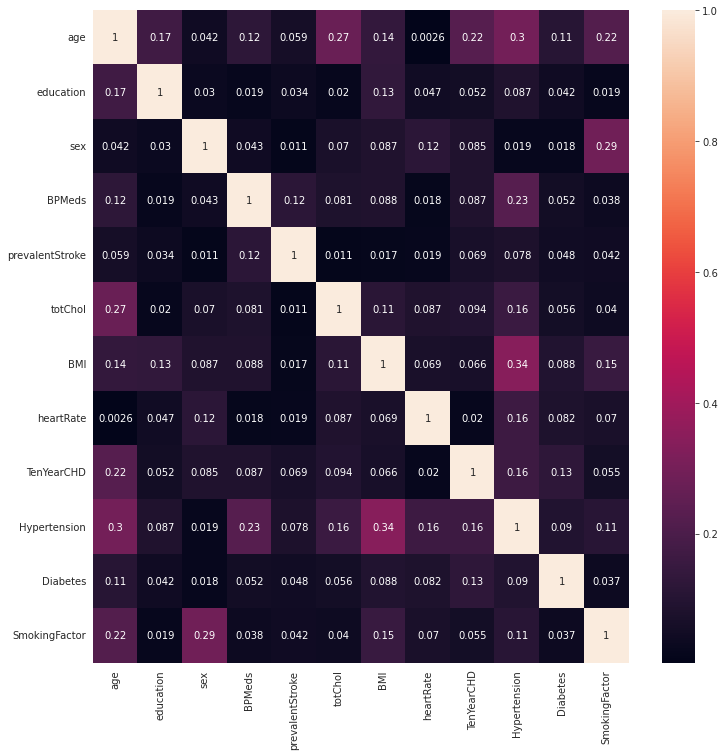

In [ ]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = df_cd.corr()
sns.heatmap(abs(correlation), annot=True)

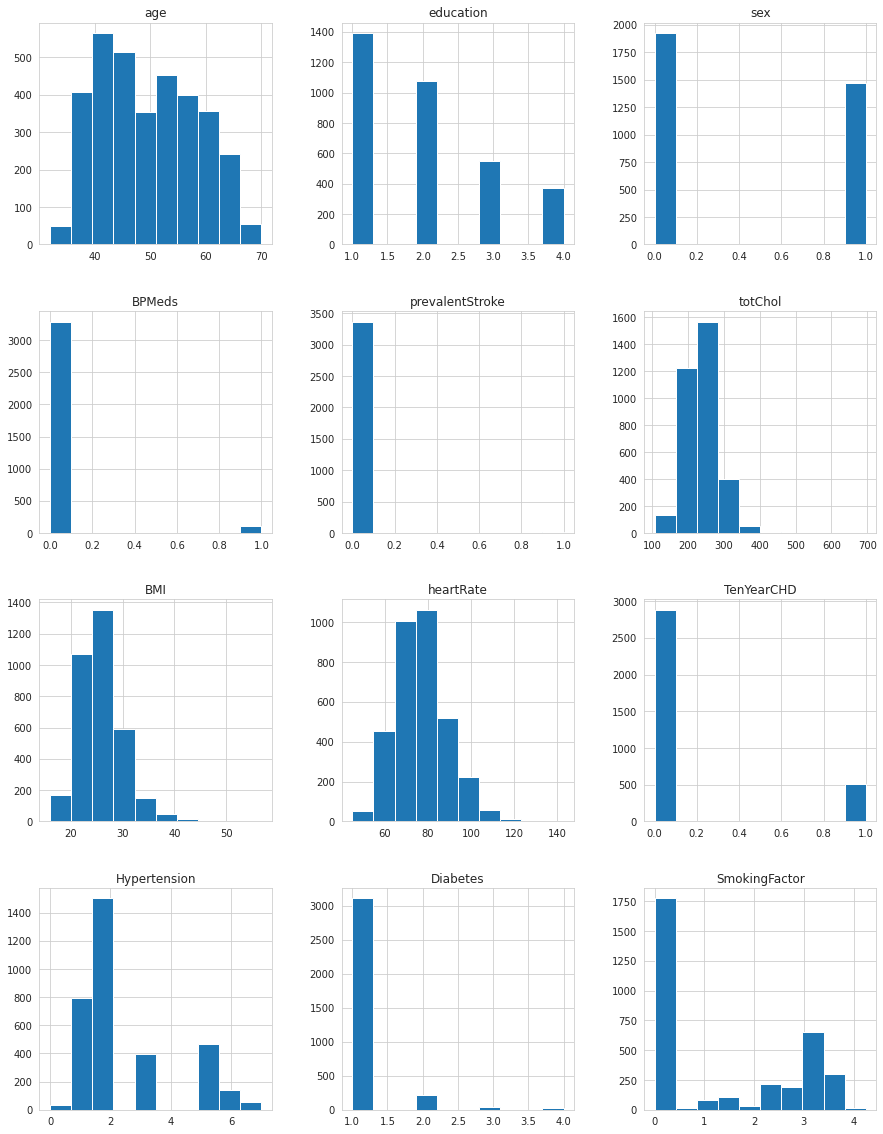

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_cd.hist(ax = ax)
plt.show()

BPMeds and prevalentStroke does not help in explaining variance so we can remove those columns.

[ ]


In [ ]:
# remove not useful columns
df_cd.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [ ]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3390 non-null   int64  
 1   education      3390 non-null   float64
 2   sex            3390 non-null   int64  
 3   totChol        3390 non-null   float64
 4   BMI            3390 non-null   float64
 5   heartRate      3390 non-null   float64
 6   TenYearCHD     3390 non-null   int64  
 7   Hypertension   3390 non-null   int64  
 8   Diabetes       3390 non-null   int64  
 9   SmokingFactor  3390 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 420.4 KB


# DEPENDENT VS INDEPENDENT VARIABLE

In [ ]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df_cd.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [ ]:
X = df_cd[independent_variable].values
y = df_cd[dependent_variable].values

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{1: 511, 0: 2879} {0: 2878, 1: 2303}


In [ ]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [ ]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# KNN

In [ ]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.97128378 0.92012548 0.90999035 0.87548263 0.86944981
 0.84242278 0.84290541 0.82625483 0.82142857]
Test Accuracy:  [0.83799421 0.83220829 0.80038573 0.80424301 0.78302797 0.78881389
 0.7704918  0.77627772 0.78302797 0.7704918 ]


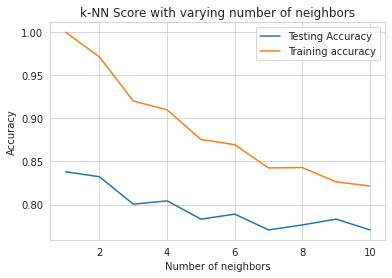

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8520707679935665

In [ ]:
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_cv.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       579
           1       0.77      0.91      0.83       458

    accuracy                           0.84      1037
   macro avg       0.84      0.85      0.84      1037
weighted avg       0.85      0.84      0.84      1037



# LOGISTIC REGRESSION

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.64480666, -0.05737252,  0.18965426,  0.11330946, -0.03206543,
         0.00412319,  0.27480988,  0.22856604,  0.29853178]])

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6674710424710425
The accuracy on test data is  0.6615236258437801


[[1702  597]
 [ 781 1064]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

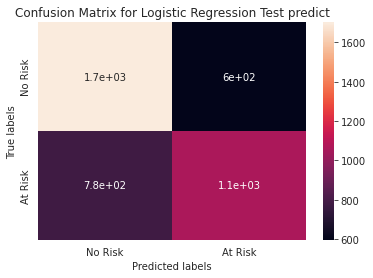

In [ ]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[422 157]
 [194 264]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

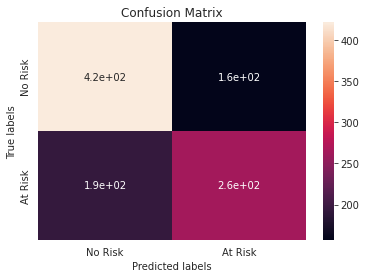

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6526310232217875
Accuracy score: 0.6615236258437801
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2299
           1       0.64      0.58      0.61      1845

    accuracy                           0.67      4144
   macro avg       0.66      0.66      0.66      4144
weighted avg       0.67      0.67      0.67      4144



              precision    recall  f1-score   support

           0       0.69      0.73      0.71       579
           1       0.63      0.58      0.60       458

    accuracy                           0.66      1037
   macro avg       0.66      0.65      0.65      1037
weighted avg       0.66      0.66      0.66      1037



# DECISION TREE MODEL

In [ ]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

Train and Test Data

In [ ]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [ ]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 81.19575699132112
the training accuracy is 84.07335907335907


[Text(0.43023255813953487, 0.9615384615384616, 'X[0] <= -0.592\nentropy = 0.991\nsamples = 4144\nvalue = [2299, 1845]'),
 Text(0.18604651162790697, 0.8846153846153846, 'X[8] <= -0.955\nentropy = 0.778\nsamples = 1397\nvalue = [1076, 321]'),
 Text(0.11627906976744186, 0.8076923076923077, 'X[3] <= 1.391\nentropy = 0.434\nsamples = 504\nvalue = [459, 45]'),
 Text(0.06976744186046512, 0.7307692307692307, 'X[0] <= -1.154\nentropy = 0.386\nsamples = 490\nvalue = [453, 37]'),
 Text(0.046511627906976744, 0.6538461538461539, 'X[3] <= -1.671\nentropy = 0.218\nsamples = 258\nvalue = [249, 9]'),
 Text(0.023255813953488372, 0.5769230769230769, 'entropy = 0.773\nsamples = 22\nvalue = [17, 5]'),
 Text(0.06976744186046512, 0.5769230769230769, 'entropy = 0.124\nsamples = 236\nvalue = [232, 4]'),
 Text(0.09302325581395349, 0.6538461538461539, 'entropy = 0.531\nsamples = 232\nvalue = [204, 28]'),
 Text(0.16279069767441862, 0.7307692307692307, 'X[6] <= -0.224\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]

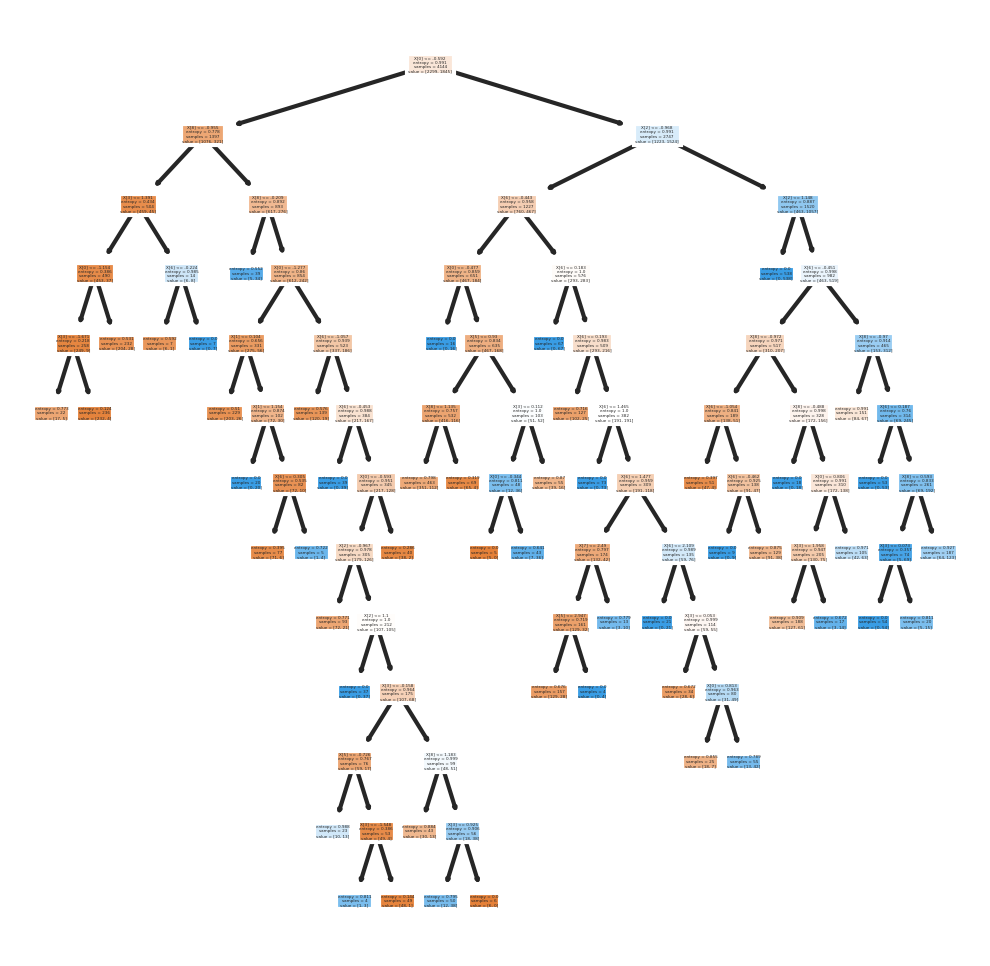

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[2133  166]
 [ 494 1351]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

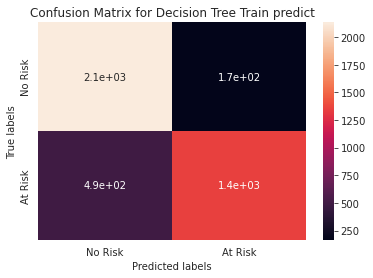

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[516  63]
 [132 326]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

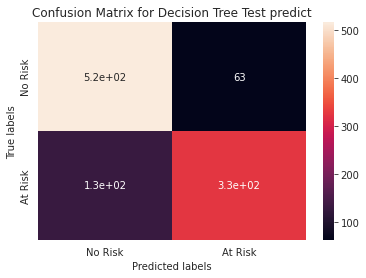

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2299
           1       0.89      0.73      0.80      1845

    accuracy                           0.84      4144
   macro avg       0.85      0.83      0.83      4144
weighted avg       0.85      0.84      0.84      4144



In [ ]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       579
           1       0.84      0.71      0.77       458

    accuracy                           0.81      1037
   macro avg       0.82      0.80      0.81      1037
weighted avg       0.81      0.81      0.81      1037



# RANDOM FOREST

In [ ]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
#Finding the accuracy and Roc_Auc score
accuracy_score(y_train,train_preds)

0.9897018970189702

In [ ]:
accuracy_score(y_test,test_preds)

0.8842815814850531

In [ ]:
roc_auc_score(y_test,test_preds)

0.8760681343379264

In [ ]:
roc_auc_score(y_train,train_preds)

0.9897018970189702

[[2299    0]
 [  38 1807]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

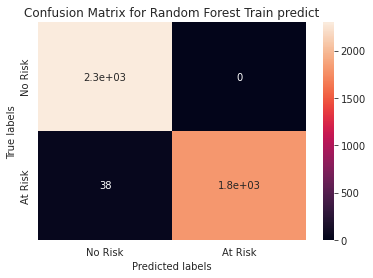

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[548  31]
 [ 89 369]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

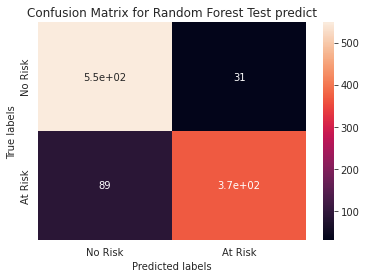

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2299
           1       1.00      0.98      0.99      1845

    accuracy                           0.99      4144
   macro avg       0.99      0.99      0.99      4144
weighted avg       0.99      0.99      0.99      4144



In [ ]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       579
           1       0.92      0.81      0.86       458

    accuracy                           0.88      1037
   macro avg       0.89      0.88      0.88      1037
weighted avg       0.89      0.88      0.88      1037



# GRADIENT BOOSTING

In [ ]:
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [ ]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [ ]:
gradientBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

In [ ]:
#The accuracy and Roc_Auc Score
accuracy_score(y_train,train_preds)



0.9022683397683398

In [ ]:
accuracy_score(y_test,test_preds)

0.8765670202507232

In [ ]:
roc_auc_score(y_test,test_preds)

0.8643686223046813

In [ ]:
roc_auc_score(y_train,train_preds)

0.8920634752237039

[[2265   34]
 [ 371 1474]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

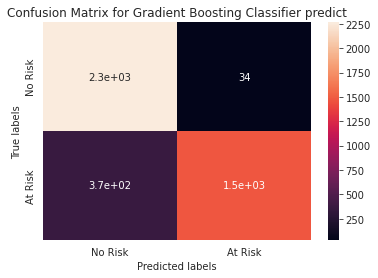

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[561  18]
 [110 348]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

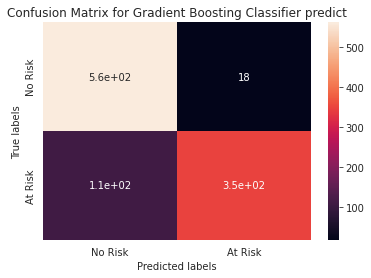

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

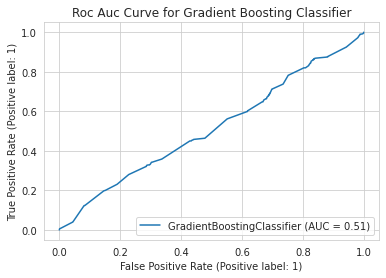

In [ ]:
plot_roc_curve(gradientBC,X,y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

In [ ]:
#classification report of train and test
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       579
           1       0.95      0.76      0.84       458

    accuracy                           0.88      1037
   macro avg       0.89      0.86      0.87      1037
weighted avg       0.89      0.88      0.87      1037



              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2299
           1       0.98      0.80      0.88      1845

    accuracy                           0.90      4144
   macro avg       0.92      0.89      0.90      4144
weighted avg       0.91      0.90      0.90      4144



# XG BOOST

In [ ]:
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [ ]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [ ]:
#The accuracy and Roc_Auc Score
accuracy_score(y_train,train_preds)

0.8223938223938224

In [ ]:
accuracy_score(y_test,test_preds)

0.9488910318225651

In [ ]:
roc_auc_score(y_test,test_preds)

0.944877480371971

In [ ]:
roc_auc_score(y_train,train_preds)

0.8162224414762633

[[2006  293]
 [ 443 1402]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

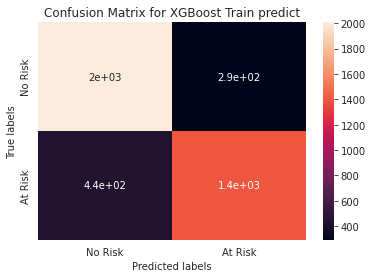

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[567  12]
 [ 41 417]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

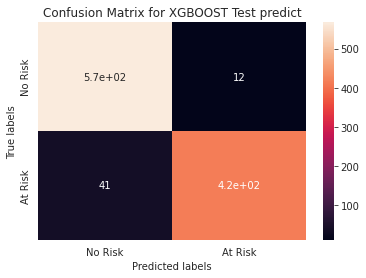

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classification Report For train and test

In [ ]:
#Classification Report For train and test

print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       579
           1       0.97      0.91      0.94       458

    accuracy                           0.95      1037
   macro avg       0.95      0.94      0.95      1037
weighted avg       0.95      0.95      0.95      1037



              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2299
           1       0.83      0.76      0.79      1845

    accuracy                           0.82      4144
   macro avg       0.82      0.82      0.82      4144
weighted avg       0.82      0.82      0.82      4144



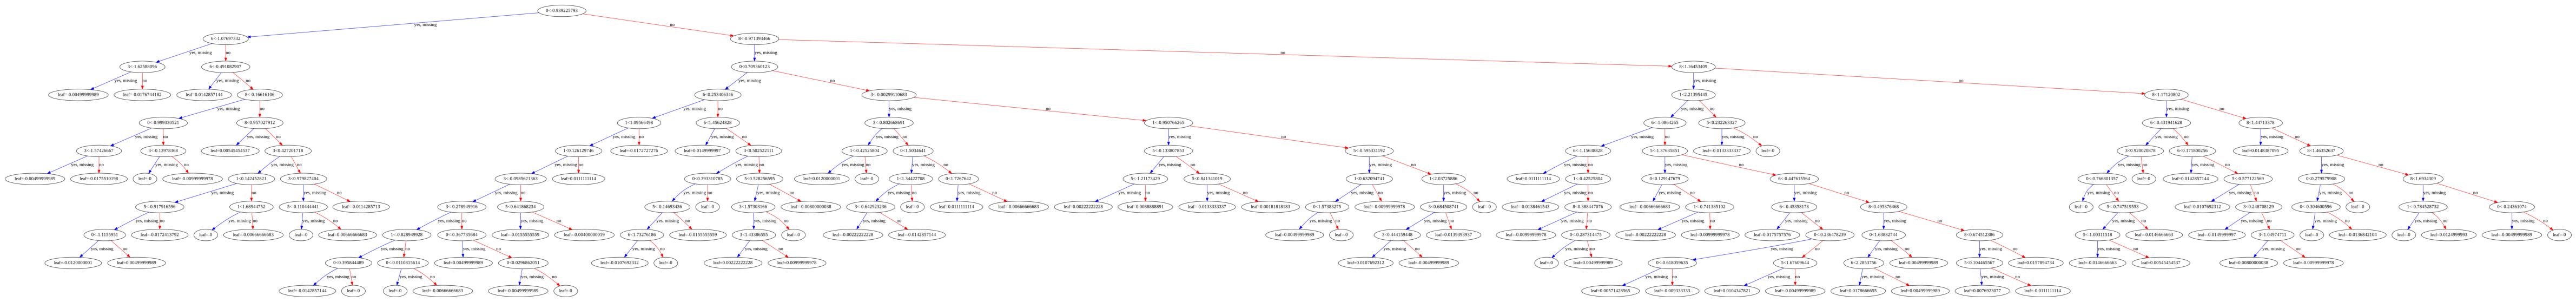

In [ ]:
#VISUALIZING TREE
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100, 10)
plt.show()

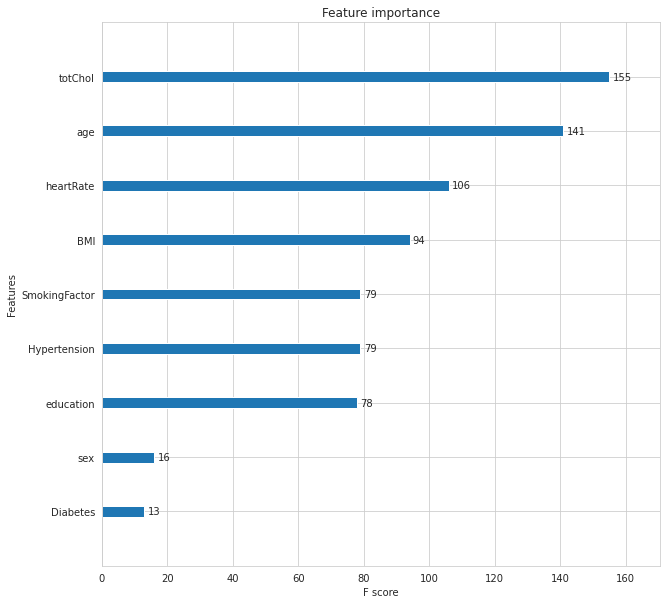

In [ ]:
orig_feature_names = list(df_cd.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()